In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.DataFrame(np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70,75, 65, 84,90, 150]), 
columns = ['salaire'])  

In [11]:
df

,salaire
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


#### Среднее арифметическое

In [15]:
moyen_salaire = df['salaire'].sum() / df['salaire'].shape[0]
moyen_salaire

73.14285714285714

#### Смещенная оценка дисперсии

In [21]:
variance_biaisée = ((df['salaire'] - moyen_salaire) ** 2).sum() / df['salaire'].shape[0]
variance_biaisée

2135.0748299319725

#### Несмещенная оценка дисперсии

In [20]:
variance_non_biaisée = ((df['salaire'] - moyen_salaire) ** 2).sum() / (df['salaire'].shape[0] - 1)
variance_non_biaisée

2241.828571428571

#### Среднеквадратичное отклонение

In [22]:
écart_type = np.sqrt(((df['salaire'] - moyen_salaire)**2).sum() / df['salaire'].count())
écart_type

46.206869943028735

Проверка 

In [23]:
df['salaire'].mean()

73.14285714285714

In [24]:
df['salaire'].std(ddof=0)

46.20686994302874

In [25]:
df['salaire'].var()

2241.8285714285716

In [27]:
df['salaire'].var(ddof=0)

2135.074829931973

#### Медиана

In [30]:
salaire = sorted(df['salaire'])



In [32]:
salaire

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150,
 230]

In [41]:
longueur = len(salaire)

Так как у нас длинна списка равна нечетному числу выявляем число стоящее ровно посередине

In [42]:
médiane = salaire[longueur // 2]
médiane

70

Проверка

In [43]:
df['salaire'].median()

70.0

#### Первый квартиль

Здесь ровно посередине вычислить уже не получится поэтому сдигаем на единицу чтобы разделить на четыре части

In [46]:
premier_quartile = (longueur // 2 + 1) // 2
salaire[premier_quartile]

45

Проверка

In [47]:
df['salaire'].quantile(0.25)

45.0

#### Третий квартиль

откладываем первый квартиль три раза 

In [65]:
troisième_quartile = ((longueur // 2 + 1) // 2)*3
salaire[troisième_quartile]

84

Проверка

In [51]:
df['salaire'].quantile(0.75)

84.0

####  Интерквартильный размах

В нашей ситуации интерквартильный размах будет начинаться от первого квартиля и заканчиваться третьим (с 5 по 15 позицию), так как количество наблюдейний нечетное, число с которого начинается третий квартиль не вошло, длинна интеркартильного расстояния будет равна 10

In [78]:
envergure_interquartile  = salaire[premier_quartile : troisième_quartile]
print(envergure_interquartile)
eil = troisième_quartile - premier_quartile
print(eil)

[45, 55, 57, 65, 65, 70, 75, 75, 77, 80]
10


#### Диаграмма

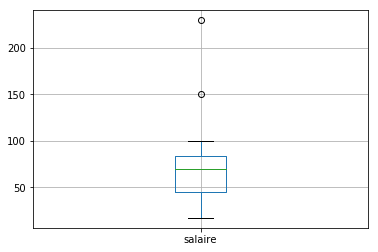

In [68]:
df[['salaire']].boxplot()

In [95]:
pq = df['salaire'].quantile(0.25)
tq = df['salaire'].quantile(0.75)
iq = tq - pq
boxplot_envergure = (pq - 1.5 * iq, tq + 1.5 * iq)

In [99]:
iq* 1.5

58.5

In [97]:
boxplot_envergure

(-13.5, 142.5)

Размер усов почему-то не соответсвует вычислениям. Верхний ус на диаграмме замер на отметке 100, хотя по вычислениям он должен быть 145,5

 Выбросы

In [100]:
aberrantes = df.loc[(df['salaire'] < boxplot_envergure[0]) | (df['salaire'] > boxplot_envergure[1])]
aberrantes

,salaire
11,230
20,150


In [104]:
from sympy import *

###  Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Сначала вычисляем полную вероятность того, что студент любого факультета сдаст первую сессию. По условиям задачи на факультете А учится четверть студентов, на факультете В также четверть, на факультете С солько же сколько на А и В вместе, то есть половина


In [102]:
PA = 0.8 * 1/4 + 0.7 * 1/4 + 0.9 * 1/2
PA

0.825

Теперь три раза по формуле Байеса вычисляем вероятность для каждого факультета

P(B1|A) = P(A|B1) * P(B1) / P(A)  = (0.8 * 1/4) / 0.825 = 0.(24)

P(B2|A) = P(A|B2) * P(B2) / P(A) = (0.7 * 1/4) / 0.825 = 0.(21)

P(B3|A) = P(A|B3) * P(B3) / P(A) = (0.9 * 1/2) / 0.825 = 0.(54)

Вот такие вероятности для каждого факультета